<h1><center> Electron Energy Flux Prediction </center></h1>
<h2><center> Part 1. Exploratory Data Analysis </center></h2>
<h2><center> Sugata Ghosh </center></h2>

Next notebook: [Electron Energy Flux Prediction - Part 2. Modeling](https://www.kaggle.com/sugataghosh/electron-energy-flux-prediction-part-2-modeling)

### Contents

- [Basic Data Exploration](#1.-Basic-Data-Exploration)
- [Univariate Analysis](#2.-Univariate-Analysis)
- [Multivariate Analysis](#3.-Multivariate-Analysis)
- [Acknowledgements](#Acknowledgements)
- [References](#References)

### Importing libraries

In [1]:
%%capture
# File system manangement
import time, psutil, os, gc

# Progress bar for loops
!pip install tqdm
from tqdm import tqdm

# Mathematical functions
import math

# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_theme()

In [2]:
# Runtime and memory usage
start = time.time()
process = psutil.Process(os.getpid())

### Data

Source: https://www.kaggle.com/datasets/saurabhshahane/dmsp-particle-precipitation-aiready-data

In [3]:
# Loading the data
data = pd.read_csv('../input/dmsp-particle-precipitation-aiready-data/DMSP_final_training.csv')
print(pd.Series({"Memory usage": "{:.2f} MB".format(data.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data.shape)}).to_string())
print(" ")
data.head()

Memory usage        1098.54 MB
Dataset shape    (1945789, 74)
 


,Datetimes,SC_AACGM_LAT,ELE_TOTAL_ENERGY_FLUX,ID_SC,sin_ut,cos_ut,sin_doy,cos_doy,sin_SC_AACGM_LTIME,cos_SC_AACGM_LTIME,...,psw_30min,Bz_10min,By_10min,Bx_10min,AL_10min,AU_10min,SymH_10min,PC_10min,vsw_10min,psw_10min
0,1987-01-12 12:57:00,51.143220,6.464854e+08,6.0,-0.246153,-0.969231,0.205104,0.97874,0.996134,0.087845,...,3.61,1.25,6.52,-3.03,-36.0,19.0,4.0,0.71,364.4,3.09
1,1987-01-12 12:58:00,54.137207,7.884885e+08,6.0,-0.250380,-0.968148,0.205104,0.97874,0.992626,0.121216,...,3.61,1.25,6.52,-3.03,-36.0,19.0,4.0,0.71,364.4,3.09
2,1987-01-12 13:01:00,62.928176,1.404024e+09,6.0,-0.263031,-0.964787,0.205104,0.97874,0.968006,0.250928,...,3.66,1.51,6.42,-2.72,-61.0,25.0,3.0,0.77,356.0,2.96
3,1987-01-12 13:02:00,65.719631,6.078507e+10,6.0,-0.267238,-0.963630,0.205104,0.97874,0.950633,0.310316,...,3.66,1.51,6.42,-2.72,-61.0,25.0,3.0,0.77,356.0,2.96
4,1987-01-12 13:03:00,68.392364,1.229411e+12,6.0,-0.271440,-0.962455,0.205104,0.97874,0.924624,0.380881,...,3.66,1.51,6.42,-2.72,-61.0,25.0,3.0,0.77,356.0,2.96


### Project Objective

The goal is to predict `ELE_TOTAL_ENERGY_FLUX`, which is a continuous variable, based on the features available in the dataset.

# 1. Basic Data Exploration

In [4]:
# Shape of the data
print(pd.Series({"Shape of the dataset": data.shape}).to_string())

Shape of the dataset    (1945789, 74)


In [5]:
# Count of observations
print(pd.Series({"Number of observations in the dataset": len(data)}).to_string())

Number of observations in the dataset    1945789


In [6]:
# Count of columns
print(pd.Series({"Total number of columns in the dataset": len(data.columns)}).to_string())

Total number of columns in the dataset    74


In [7]:
# Column names
data.columns

Index(['Datetimes', 'SC_AACGM_LAT', 'ELE_TOTAL_ENERGY_FLUX', 'ID_SC', 'sin_ut',
       'cos_ut', 'sin_doy', 'cos_doy', 'sin_SC_AACGM_LTIME',
       'cos_SC_AACGM_LTIME', 'F107', 'Bz', 'By', 'Bx', 'AL', 'AU', 'SymH',
       'PC', 'vsw', 'psw', 'Bz_6hr', 'By_6hr', 'Bx_6hr', 'AL_6hr', 'AU_6hr',
       'SymH_6hr', 'PC_6hr', 'vsw_6hr', 'psw_6hr', 'Bz_3hr', 'By_3hr',
       'Bx_3hr', 'AL_3hr', 'AU_3hr', 'SymH_3hr', 'PC_3hr', 'vsw_3hr',
       'psw_3hr', 'Bz_1hr', 'By_1hr', 'Bx_1hr', 'AL_1hr', 'AU_1hr', 'SymH_1hr',
       'PC_1hr', 'vsw_1hr', 'psw_1hr', 'Bz_45min', 'By_45min', 'Bx_45min',
       'AL_45min', 'AU_45min', 'SymH_45min', 'PC_45min', 'vsw_45min',
       'psw_45min', 'Bz_30min', 'By_30min', 'Bx_30min', 'AL_30min', 'AU_30min',
       'SymH_30min', 'PC_30min', 'vsw_30min', 'psw_30min', 'Bz_10min',
       'By_10min', 'Bx_10min', 'AL_10min', 'AU_10min', 'SymH_10min',
       'PC_10min', 'vsw_10min', 'psw_10min'],
      dtype='object')

In [8]:
# Column datatypes
print(data.dtypes)

Datetimes                 object
SC_AACGM_LAT             float64
ELE_TOTAL_ENERGY_FLUX    float64
ID_SC                    float64
sin_ut                   float64
                          ...   
AU_10min                 float64
SymH_10min               float64
PC_10min                 float64
vsw_10min                float64
psw_10min                float64
Length: 74, dtype: object


In [9]:
# Count of column datatypes
cols_int = data.columns[data.dtypes == 'int64'].tolist()
cols_float = data.columns[data.dtypes == 'float64'].tolist()
cols_object = data.columns[data.dtypes == 'object'].tolist()
print(pd.Series({"Number of integer columns": len(cols_int),
                 "Number of float columns": len(cols_float),
                 "Number of object columns": len(cols_object)}).to_string())

Number of integer columns     0
Number of float columns      73
Number of object columns      1


In [10]:
cols_object

['Datetimes']

In [11]:
# Count of duplicate rows
print(pd.Series({"Number of duplicate rows in the dataset": data.duplicated().sum()}).to_string())

Number of duplicate rows in the dataset    0


In [12]:
# Constant columns
cols_constant = data.columns[data.nunique() == 1].tolist()
if len(cols_constant) == 0:
    cols_constant = "None"
print(pd.Series({"Constant columns in the dataset": cols_constant}).to_string())

Constant columns in the dataset    None


In [13]:
# Count of columns with missing values
print(pd.Series({"Number of columns with missing values in the dataset": len(data.isna().sum()[data.isna().sum() != 0])}).to_string())

Number of columns with missing values in the dataset    0


In [14]:
# Columns with missing values and respective proportions of values that are missing
print((data.isna().sum()/len(data))[data.isna().sum() != 0].sort_values(ascending = False))

Series([], dtype: float64)


In [15]:
# Statistical description of numerical variables in the dataset
data.describe()

,SC_AACGM_LAT,ELE_TOTAL_ENERGY_FLUX,ID_SC,sin_ut,cos_ut,sin_doy,cos_doy,sin_SC_AACGM_LTIME,cos_SC_AACGM_LTIME,F107,...,psw_30min,Bz_10min,By_10min,Bx_10min,AL_10min,AU_10min,SymH_10min,PC_10min,vsw_10min,psw_10min
count,1.945789e+06,1.945789e+06,1.945789e+06,1.945789e+06,1.945789e+06,1.945789e+06,1.945789e+06,1.945789e+06,1.945789e+06,1.945789e+06,...,1.945789e+06,1.945789e+06,1.945789e+06,1.945789e+06,1.945789e+06,1.945789e+06,1.945789e+06,1.945789e+06,1.945789e+06,1.945789e+06
mean,6.570635e+01,1.373119e+11,1.525736e+01,-1.545410e-02,-5.742040e-04,-5.886700e-02,1.281526e-02,3.735496e-02,-9.759640e-02,1.179359e+02,...,1.709994e+00,7.497813e-01,2.959074e-02,5.672489e-02,-6.812476e+01,4.882927e+01,-7.594912e+00,5.696859e-01,4.147391e+02,1.712483e+00
std,1.113037e+01,9.082375e+11,1.859397e+00,7.043815e-01,7.096535e-01,6.857191e-01,7.253690e-01,8.130553e-01,5.727313e-01,4.578386e+01,...,1.126584e+00,2.840595e+00,3.764705e+00,3.355476e+00,8.294130e+01,4.456893e+01,1.241943e+01,9.313294e-01,8.640116e+01,1.133739e+00
min,4.500001e+01,8.270846e+06,6.000000e+00,-1.000000e+00,-1.000000e+00,-9.999907e-01,-9.999630e-01,-1.000000e+00,-1.000000e+00,6.510000e+01,...,1.000000e-02,-9.150000e+00,-2.399000e+01,-1.769000e+01,-1.001000e+03,-3.500000e+01,-1.350000e+02,-8.120000e+00,2.097000e+02,2.000000e-02
25%,5.639839e+01,5.324880e+08,1.300000e+01,-7.163019e-01,-7.132504e-01,-7.176769e-01,-7.324941e-01,-8.898352e-01,-5.708443e-01,8.480000e+01,...,1.030000e+00,-1.080000e+00,-2.620000e+00,-2.500000e+00,-9.000000e+01,1.800000e+01,-1.400000e+01,1.000000e-02,3.515000e+02,1.030000e+00
50%,6.683312e+01,1.740703e+09,1.500000e+01,-3.053851e-02,-1.836970e-16,-1.116590e-01,2.151610e-02,2.416185e-01,-1.467515e-01,1.072000e+02,...,1.440000e+00,5.100000e-01,4.000000e-02,6.000000e-02,-3.300000e+01,3.400000e+01,-7.000000e+00,4.200000e-01,4.003000e+02,1.440000e+00
75%,7.455945e+01,4.095110e+10,1.700000e+01,6.883546e-01,7.132504e-01,6.152846e-01,7.498264e-01,8.730348e-01,3.497406e-01,1.392000e+02,...,2.070000e+00,2.260000e+00,2.680000e+00,2.590000e+00,-1.600000e+01,6.500000e+01,0.000000e+00,1.060000e+00,4.596000e+02,2.070000e+00
max,8.998340e+01,2.242452e+14,1.800000e+01,1.000000e+00,1.000000e+00,9.999907e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.999000e+02,...,4.700000e+01,5.547000e+01,2.691000e+01,3.731000e+01,3.200000e+01,4.800000e+02,8.200000e+01,1.837000e+01,9.033000e+02,4.576000e+01


In [16]:
# Statistical description of categorical variables in the dataset
data.describe(include = ['O'])

,Datetimes
count,1945789
unique,1387491
top,2001-09-07 04:43:00
freq,4


**Dataset synopsis:**

- Number of observations: $1945789$
- Number of columns: $74$
- Number of integer columns: $0$
- Number of float columns: $73$
- Number of object columns: $1$
- Number of duplicate observations: $0$
- Constant columns: None
- Number of columns with missing values: $0$
- Memory Usage: $1098.54$ MB

# 2. Univariate Analysis

- [Target variable](#2.1-Target-variable)
- [Predictor variables](#2.2-Predictor-variables)

In general, throughout the notebook, we choose the number of bins of a histogram by the [Freedman-Diaconis rule](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule), which suggests the optimal number of bins to grow as $k \sim n^{1/3},$ where $n$ is the total number of observations.

In [17]:
# Setting the number of bins
bins_fd = math.floor(len(data)**(1/3))

## 2.1. Target variable

The target variable is `ELE_TOTAL_ENERGY_FLUX`, which is a continuous variable indicating total electron energy flux.

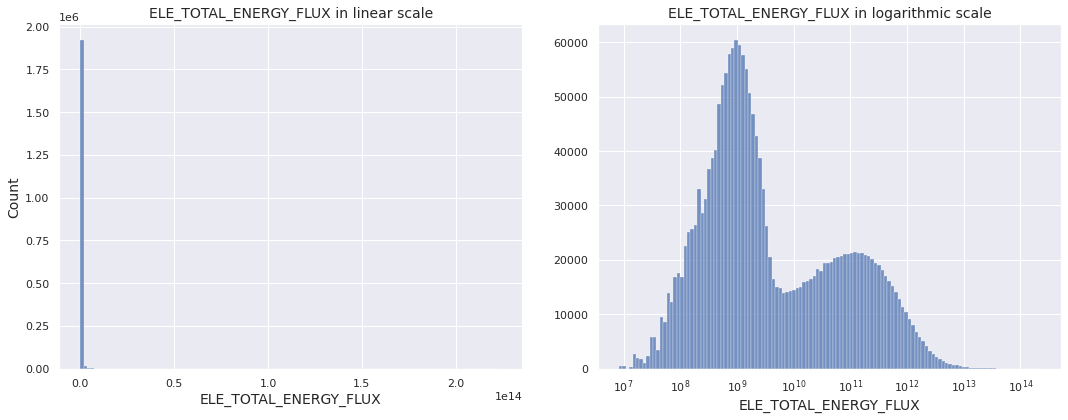

In [18]:
# Distribution of the target variable
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharey = False)
sns.histplot(data = data, x = 'ELE_TOTAL_ENERGY_FLUX', bins = bins_fd, ax = ax[0])
sns.histplot(data = data, x = 'ELE_TOTAL_ENERGY_FLUX', bins = bins_fd, log_scale = True, ax = ax[1])
ax[0].set_title("ELE_TOTAL_ENERGY_FLUX in linear scale", fontsize = 14)
ax[0].set_xlabel("ELE_TOTAL_ENERGY_FLUX", fontsize = 14)
ax[0].set_ylabel("Count", fontsize = 14)
ax[1].set_title("ELE_TOTAL_ENERGY_FLUX in logarithmic scale", fontsize = 14)
ax[1].set_xlabel("ELE_TOTAL_ENERGY_FLUX", fontsize = 14)
ax[1].set_ylabel(" ", fontsize = 14)
plt.tight_layout()
plt.show()

**Observations:**

- The target variable has extremely left-skewed distribution, which suggests applying log-transformation $y \mapsto \log{y}$ on it
- Under logarithmic scale, the distribution appears to be bimodal

## 2.2 Predictor variables

Progress: 100%|██████████| 72/72 [00:31<00:00,  2.32it/s]


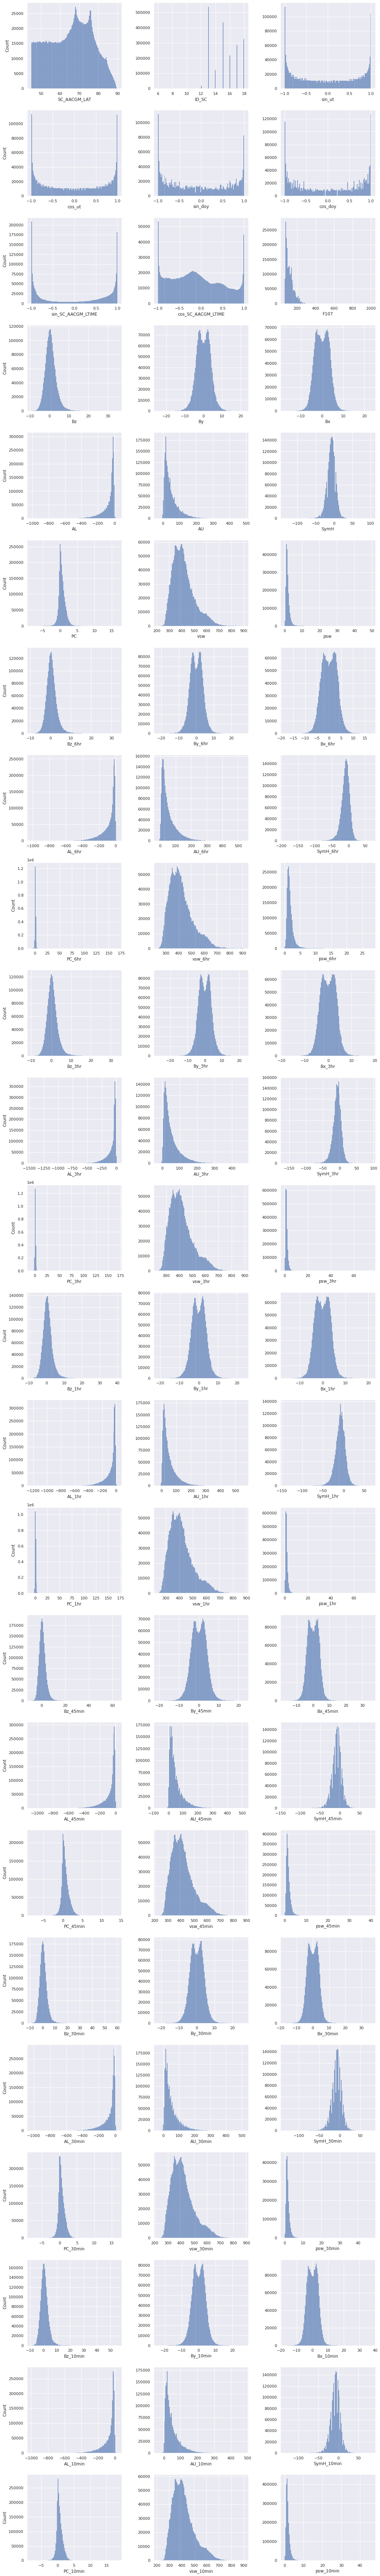

In [19]:
# Distributions of the numerical Float columns
cols = [col for col in cols_float if col != 'ELE_TOTAL_ENERGY_FLUX']
ncols = 3
nrows = math.ceil(len(cols) / ncols)
fig, ax = plt.subplots(nrows, ncols, figsize = (5 * ncols, 4.2 * nrows), sharey = False)
for i in tqdm(range(len(cols)), desc = "Progress"):
    sns.histplot(data, x = cols[i], bins = bins_fd, ax = ax[i // ncols, i % ncols])
    if i % ncols != 0:
        ax[i // ncols, i % ncols].set_ylabel(" ")
plt.tight_layout()
plt.show()

**Observations:**

- Extremely skewed columns: `ELE_AVG_ENERGY`
- Moderately skewed columns: `ELE_TOTAL_ENERGY_FLUX_STD`, `ELE_AVG_ENERGY_STD`, `F107`, `AE`, `AU`, `F107_6hr`, `AE_6hr`, `AU_6hr`, `psw_6hr`, `F107_5hr`, `AE_5hr`, `AU_5hr`, `PC_5hr`, `psw_5hr`, `F107_3hr`, `AE_3hr`, `AU_3hr`, `psw_3hr`, `F107_1hr`, `AE_1hr`, `AU_1hr`, `psw_1hr`, `F107_45min`, `AE_45min`, `AU_45min`, `psw_45min`, `F107_30min`, `AE_30min`, `AU_30min`, `psw_30min`, `F107_15min`, `AE_15min`, `AU_15min`, `psw_15min`, `F107_10min`, `AE_10min`, `AU_10min`, `psw_10min`, `F107_5min`, `AE_5min`, `AU_5min`, `psw_5min`
- Extremely leptokurtic columns: `PC_6hr`, `PC_5hr`, `PC_3hr`, `PC_1hr`
- Moderately skewed columns taking negative values: `AL`, `psw`, `AL_6hr`, `AL_5hr`, `AL_3hr`, `AL_1hr`, `AL_45min`, `AL_30min`, `AL_15min`, `AL_10min`, `AL_5min`
- Columns with zero-inflated distribution: `borovsky`, `newell`, `borovsky_45min`, `newell_45min`, `borovsky_30min`, `newell_30min`, `borovsky_15min`, `newell_15min`, `borovsky_10min`, `newell_10min`, `borovsky_5min`, `newell_5min`

In [20]:
cols_skewed_ext = ['ELE_AVG_ENERGY']
cols_skewed_mod = ['ELE_TOTAL_ENERGY_FLUX_STD', 'ELE_AVG_ENERGY_STD', 'F107', 'AE', 'AU', 'F107_6hr', 'AE_6hr', 'AU_6hr', 'psw_6hr',
                   'F107_5hr', 'AE_5hr', 'AU_5hr', 'PC_5hr', 'psw_5hr', 'F107_3hr', 'AE_3hr', 'AU_3hr', 'psw_3hr', 'F107_1hr', 'AE_1hr',
                   'AU_1hr', 'psw_1hr', 'F107_45min', 'AE_45min', 'AU_45min', 'psw_45min', 'F107_30min', 'AE_30min', 'AU_30min', 'psw_30min',
                   'F107_15min', 'AE_15min', 'AU_15min', 'psw_15min', 'F107_10min', 'AE_10min', 'AU_10min', 'psw_10min', 'F107_5min',
                   'AE_5min', 'AU_5min', 'psw_5min']
cols_lepto = ['PC_6hr', 'PC_5hr', 'PC_3hr', 'PC_1hr']
cols_skewed_neg = ['AL', 'psw', 'AL_6hr', 'AL_5hr', 'AL_3hr', 'AL_1hr', 'AL_45min', 'AL_30min', 'AL_15min', 'AL_10min', 'AL_5min']
cols_zero_inflated = ['borovsky', 'newell', 'borovsky_45min', 'newell_45min', 'borovsky_30min', 'newell_30min', 'borovsky_15min', 'newell_15min',
                       'borovsky_10min', 'newell_10min', 'borovsky_5min', 'newell_5min']

# 3. Multivariate Analysis

- [Pairwise correlation coefficients](#3.1.-Pairwise-correlation-coefficients)
- [Groupwise correlation structure](#3.2.-Groupwise-correlation-structure)
- [Correlation structure within groups](#3.3.-Correlation-structure-within-groups)
- [Correlation structure between groups](#3.4.-Correlation-structure-between-groups)

## 3.1. Pairwise correlation coefficients

In [21]:
# Dataframe of correlation coefficients of pairs of selected columns
def corr_df(df, cols):
    df_corr_coeff = pd.DataFrame(columns = ['feature_1', 'feature_2', 'corr_coeff'])
    for i in tqdm(range(len(cols)), desc = "Progress"):
        for j in range(len(cols)):
            if i<j:
                df_corr_coeff.loc[len(df_corr_coeff.index)] = [cols[i], cols[j], df[cols[i]].corr(df[cols[j]])]
    return df_corr_coeff.sort_values(by = 'corr_coeff', ascending = False)

In [22]:
# Correlation coefficients of pairs of numerical features
cols = [col for col in cols_float if col != 'ELE_TOTAL_ENERGY_FLUX']
df_corr_coeff = corr_df(data, cols)
display(df_corr_coeff)

Progress: 100%|██████████| 72/72 [01:31<00:00,  1.27s/it]


,feature_1,feature_2,corr_coeff
2158,vsw_1hr,vsw_45min,0.995796
1069,vsw,vsw_10min,0.995644
2374,vsw_45min,vsw_30min,0.994204
2509,vsw_30min,vsw_10min,0.993050
2167,vsw_1hr,vsw_30min,0.992567
...,...,...,...
2453,AL_30min,PC_30min,-0.614830
2282,AL_45min,PC_45min,-0.627639
1695,AL_3hr,AU_3hr,-0.639092
2028,AL_1hr,AU_1hr,-0.640316


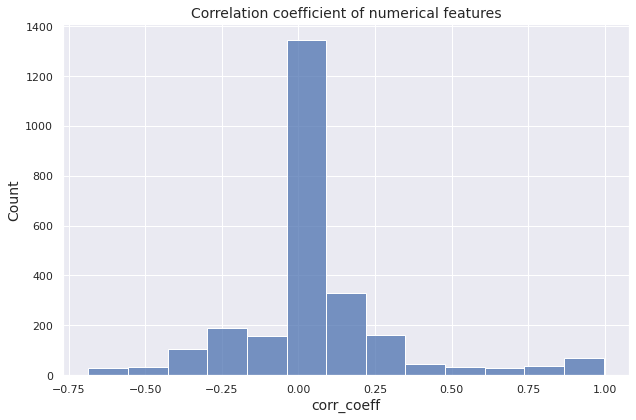

In [23]:
plt.figure(figsize = (9, 6))
s = sns.histplot(data = df_corr_coeff, x = 'corr_coeff', bins = math.floor(len(df_corr_coeff)**(1/3)))
s.set_title("Correlation coefficient of numerical features", fontsize = 14)
s.set_xlabel("corr_coeff", fontsize = 14)
s.set_ylabel("Count", fontsize = 14)
plt.tight_layout()
plt.show()

**Observations:**

- In total there are $\binom{152}{2} = 11476$ pairs of numerical features
- No significant correlation $(\left\vert r \right\vert < 0.1):$ $6061$ pairs
- Weak correlation $(0.1 \leq \left\vert r \right\vert < 0.3):$ $3195$ pairs
- Moderate correlation $(0.3 \leq \left\vert r \right\vert < 0.7):$ $1653$ pairs
- Strong correlation $(0.7 \leq \left\vert r \right\vert < 0.9):$ $222$ pairs
- Extremely strong correlation $(0.9 \leq \left\vert r \right\vert < 0.99):$ $238$ pairs
- Almost linear relationship $(0.99 \leq \left\vert r \right\vert \leq 1):$ $107$ pairs

## 3.2. Groupwise correlation structure

For the computation of mean and standard deviation of the correlation coefficients, we ignore the diagonal elements of the correlation matrix (which are always $1$) by masking it by the identity matrix of same order.

In [24]:
# Forming groups of features
group_list = [col.split("_")[0] for col in data.columns if '_6hr' in col]
group_dict = {}
for item in group_list:
    group_dict[item] = [col for col in data.columns if item in col]
group_dict['AL'].remove('ELE_TOTAL_ENERGY_FLUX')

In [25]:
# Function to obtain the correlation coefficient of two features using the dataframe 'df_corr_coeff'
def return_corr(x, y):
    if x == y:
        return 1
    elif len(df_corr_coeff[(df_corr_coeff['feature_1'] == x) & (df_corr_coeff['feature_2'] == y)]) == 1:
        return df_corr_coeff[(df_corr_coeff['feature_1'] == x) & (df_corr_coeff['feature_2'] == y)]['corr_coeff'].tolist()[0]
    else:
        return df_corr_coeff[(df_corr_coeff['feature_1'] == y) & (df_corr_coeff['feature_2'] == x)]['corr_coeff'].tolist()[0]

In [26]:
# Function to obtain matrix, mean and standard deviation of corr. coeff. of two groups of features
def corr_coeff(i, j):
    temp = []
    for x in group_dict[group_list[i]]:
        for y in group_dict[group_list[j]]:
            temp.append(return_corr(x, y))
    temp = np.array(temp)
    dim = len(list(group_dict.values())[0])
    temp = temp.reshape((dim, dim))
    if i == j:
        temp_mean = np.array([temp[k][l] for k in range(dim) for l in range(dim) if k != l]).mean()
        temp_std = np.array([temp[k][l] for k in range(dim) for l in range(dim) if k != l]).std()
    else:
        temp_mean = temp.mean()
        temp_std = temp.std()
    return temp, temp_mean, temp_std

In [27]:
# Function to plot the correlation structure of two groups of features
def corr_coeff_heatmap(i, j):
    mat = corr_coeff(i, j)[0]
    print("{}-group x {}-group correlation structure".format(group_list[i], group_list[j]))
    print(" ")
    print(pd.Series({"Mean": "{:.6f}".format(corr_coeff(i, j)[1]),
                     "Standard deviation": "{:.6f}".format(corr_coeff(i, j)[2])}).to_string())
    print(" ")
    plt.figure(figsize = (12, 9))
    mat_df = pd.DataFrame(mat)
    mat_df.index = group_dict[group_list[i]]
    mat_df.columns = group_dict[group_list[j]]
    s = sns.heatmap(mat_df, vmin = -1, vmax = 1, annot = True, cmap = plt.cm.CMRmap_r)
    s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
    s.set_xticklabels(s.get_xticklabels(), rotation = 0, fontsize = 12)
    plt.tight_layout()
    plt.show()

In [28]:
# Computing matrix of average correlation coefficients for the pairwise groups of features
avg_corr_coeff_mat = np.zeros((len(group_list), len(group_list)))
for i in range(len(group_list)):
    for j in range(len(group_list)):
        avg_corr_coeff_mat[i, j] = corr_coeff(i, j)[1]
avg_corr_coeff = pd.DataFrame(avg_corr_coeff_mat)
group_list_label = [x + "-group" for x in group_list]
avg_corr_coeff.index = group_list_label
avg_corr_coeff.columns = group_list_label

In [29]:
# Identifying pairs of groups with strong average absolute corr. coeff.
corr_coeff_threshold = 0.3
diag_list = []
non_diag_list = []
for i in range(len(group_list)):
    for j in range(len(group_list)):
        if abs(avg_corr_coeff_mat[i][j]) >= corr_coeff_threshold:
            if i == j:
                diag_list.append((i, j))
            if i < j:
                non_diag_list.append((i, j))

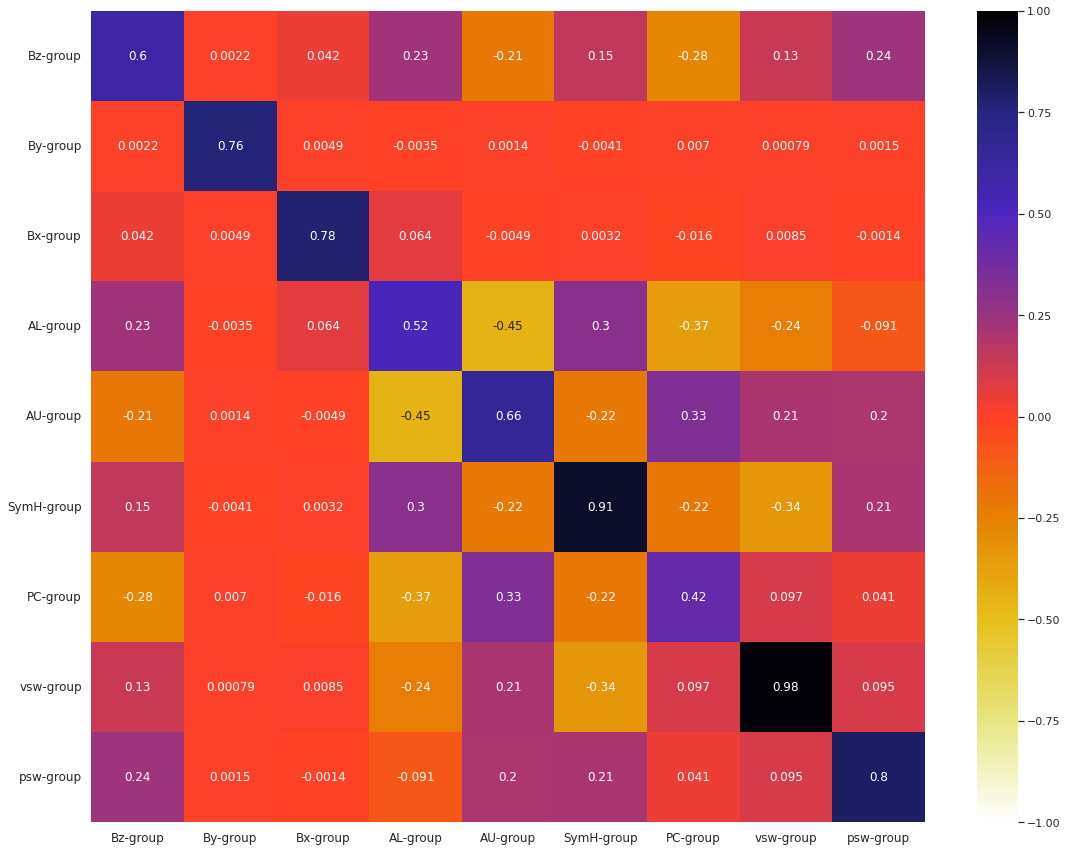

In [30]:
# Grouped heatmap
plt.figure(figsize = (16, 12))
s = sns.heatmap(avg_corr_coeff, vmin = -1, vmax = 1, annot = True, cmap = plt.cm.CMRmap_r) # fmt = ".2f" ".2g"
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 0, fontsize = 12)
plt.tight_layout()
plt.show()

To illustrate how this *grouped* heatmap works, we give an in-depth view of the top-left square, which shows the average correlation coefficient within the `Bz`-group.

Bz-group x Bz-group correlation structure
 
Mean                  0.597576
Standard deviation    0.173983
 


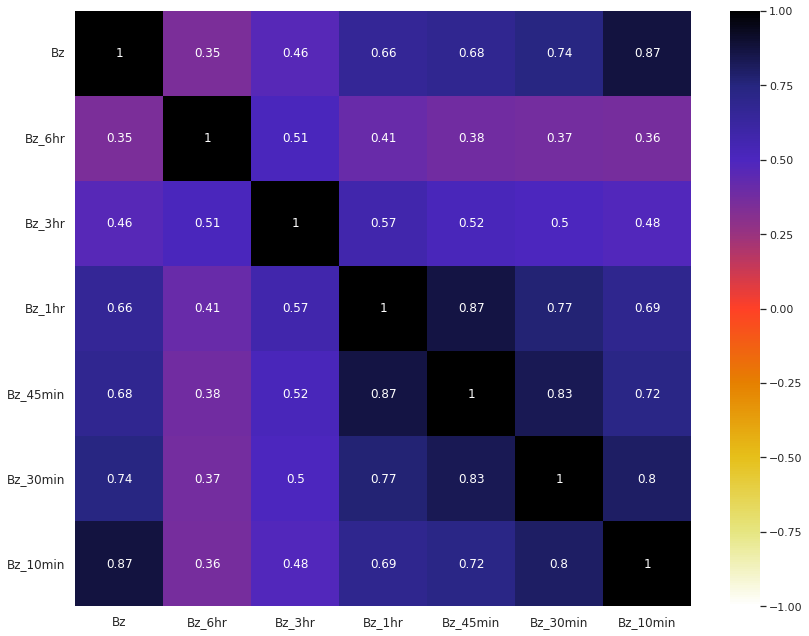

In [31]:
# Correlation structure of Bz-group
corr_coeff_heatmap(0, 0)

**Observations from the grouped heatmap:**

- The diagonal squares show that all the groups have moderate to high average correlation among its features (taken as pairs). We shall take in-depth look into each of the groups.
- The non-diagonal squares show that the average correlation between different groups varies from extremely negative to moderately positive. Some squares with strong (positive or negative) correlation, which we may want to look into, are given in `first group` $\times$ `second group` format:
  - `vsw-group` $\times$ `vx-group`
  - `AE-group` $\times$ `AL-group`
  - `AE-group` $\times$ `AU-group`
  - `AL-group` $\times$ `AU-group`
  - `AE-group` $\times$ `newell-group`
  - `AE-group` $\times$ `PC-group`
  - `Bz-group` $\times$ `newell-group`
  - `AU-group` $\times$ `newell-group`
  - `AL-group` $\times$ `PC-group`
  - `AL-group` $\times$ `newell-group`
  - `SymH-group` $\times$ `vsw-group`
  - `SymH-group` $\times$ `vx-group`
  - `PC-group` $\times$ `newell-group`
  - `AU-group` $\times$ `PC-group`
  - `borovsky-group` $\times$ `newell-group`
  - `Bz-group` $\times$ `borovsky-group`
  - `AL-group` $\times$ `SymH-group`

## 3.3. Correlation structure within groups

Bz-group x Bz-group correlation structure
 
Mean                  0.597576
Standard deviation    0.173983
 


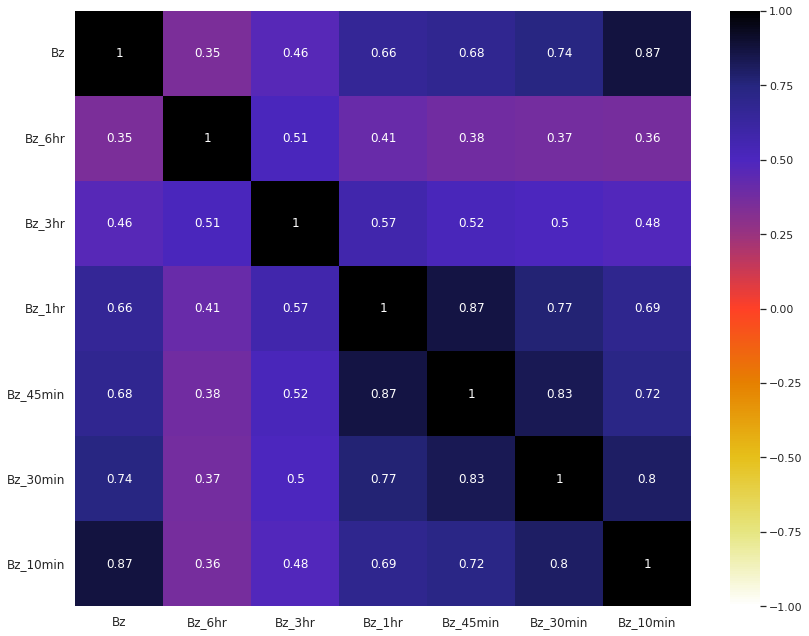

 
By-group x By-group correlation structure
 
Mean                  0.758097
Standard deviation    0.118305
 


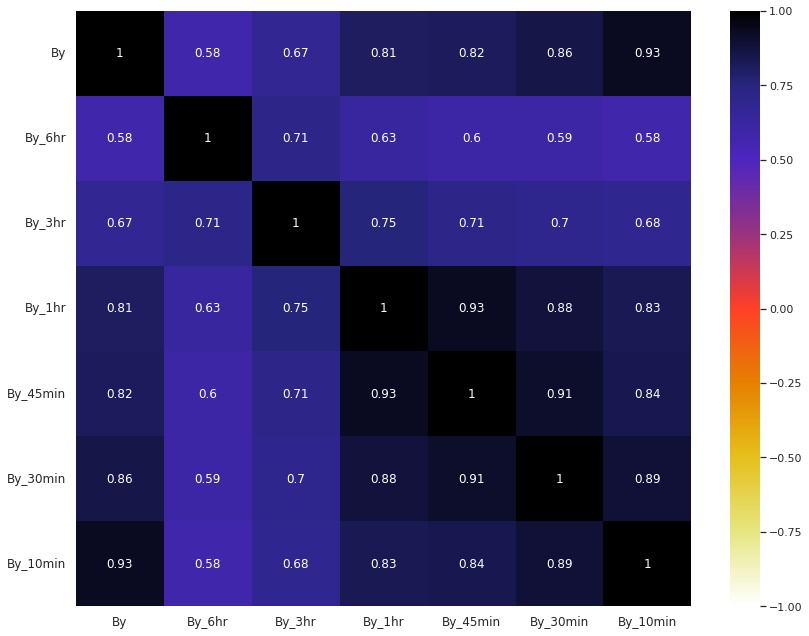

 
Bx-group x Bx-group correlation structure
 
Mean                  0.777339
Standard deviation    0.109569
 


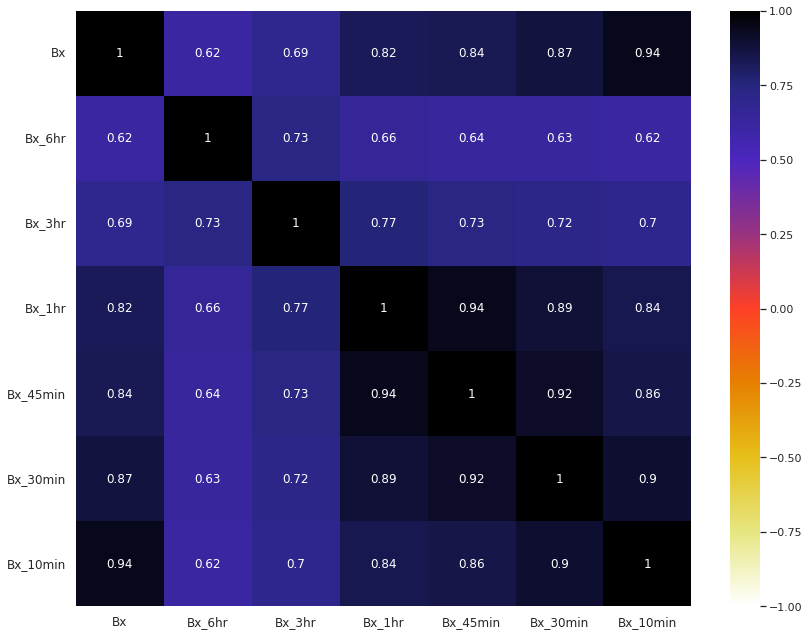

 
AL-group x AL-group correlation structure
 
Mean                  0.521649
Standard deviation    0.244167
 


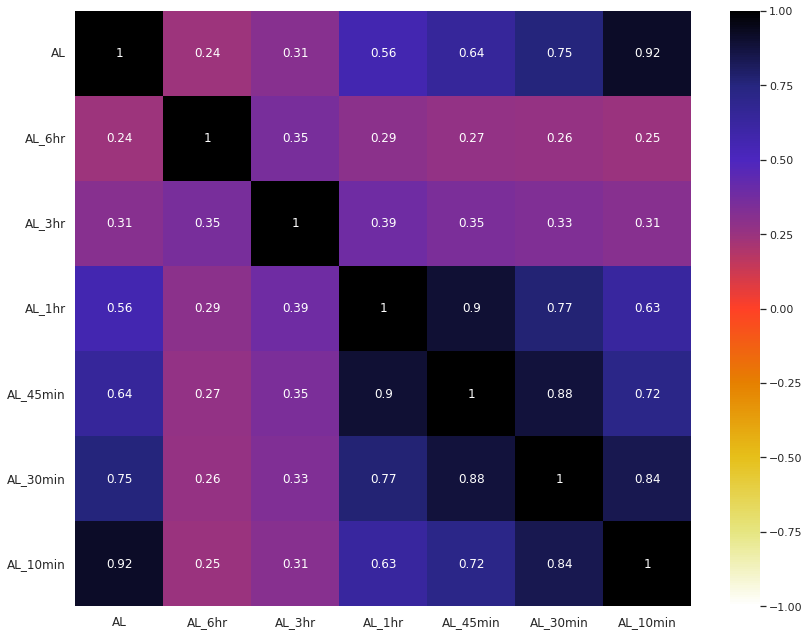

 
AU-group x AU-group correlation structure
 
Mean                  0.661441
Standard deviation    0.193782
 


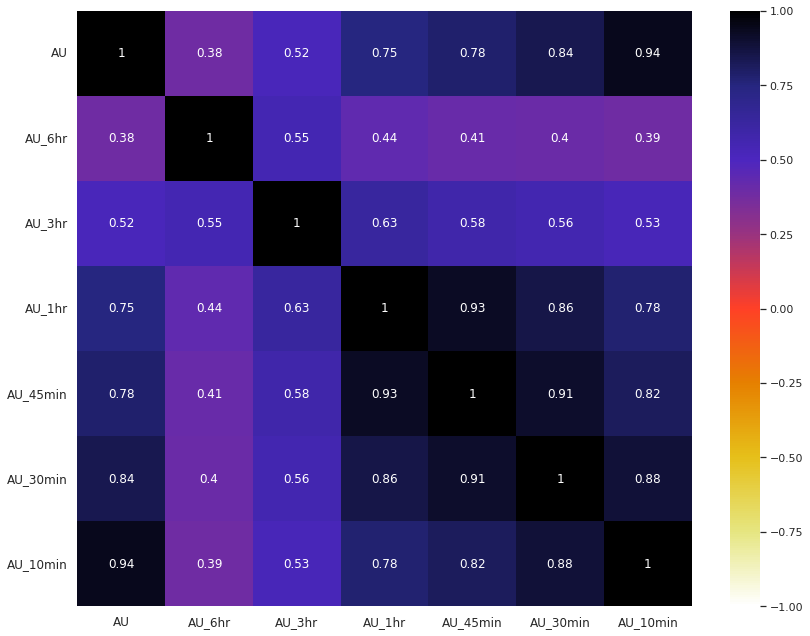

 
SymH-group x SymH-group correlation structure
 
Mean                  0.909753
Standard deviation    0.069950
 


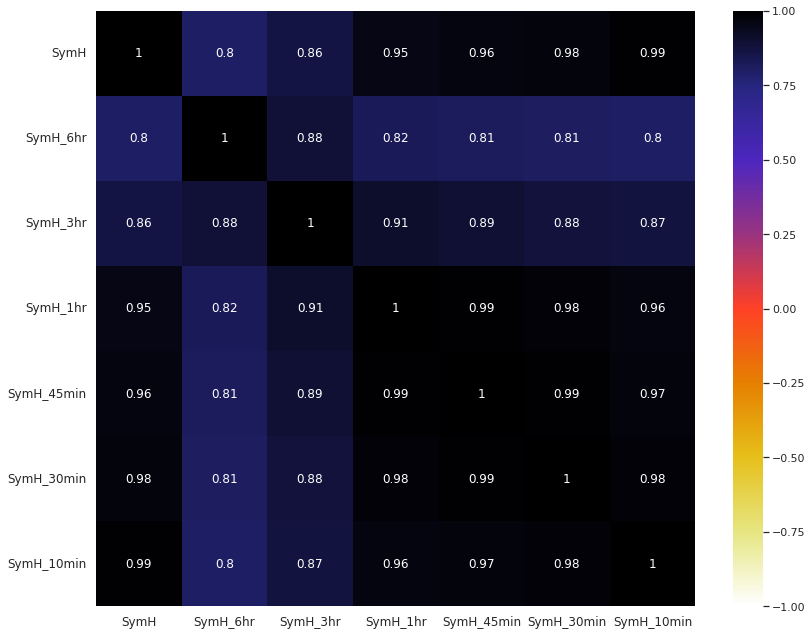

 
PC-group x PC-group correlation structure
 
Mean                  0.421156
Standard deviation    0.284222
 


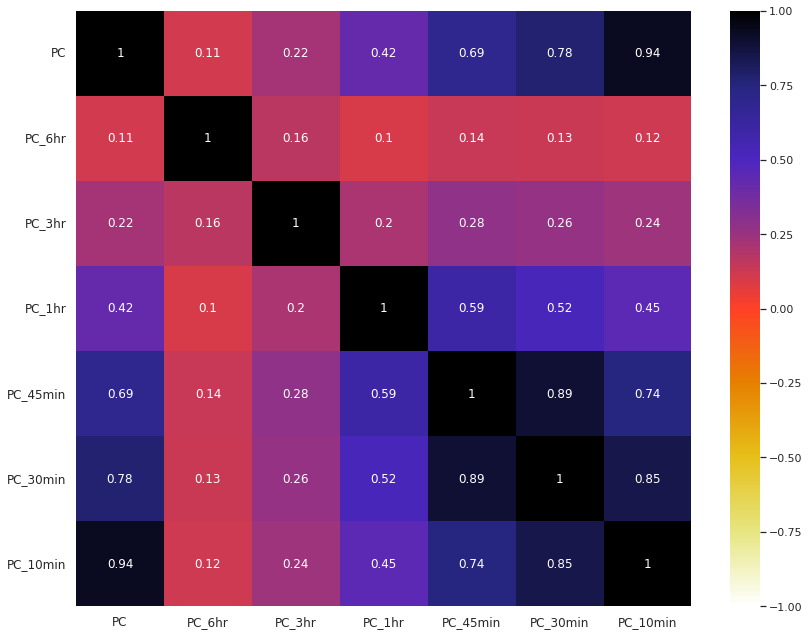

 
vsw-group x vsw-group correlation structure
 
Mean                  0.979405
Standard deviation    0.014427
 


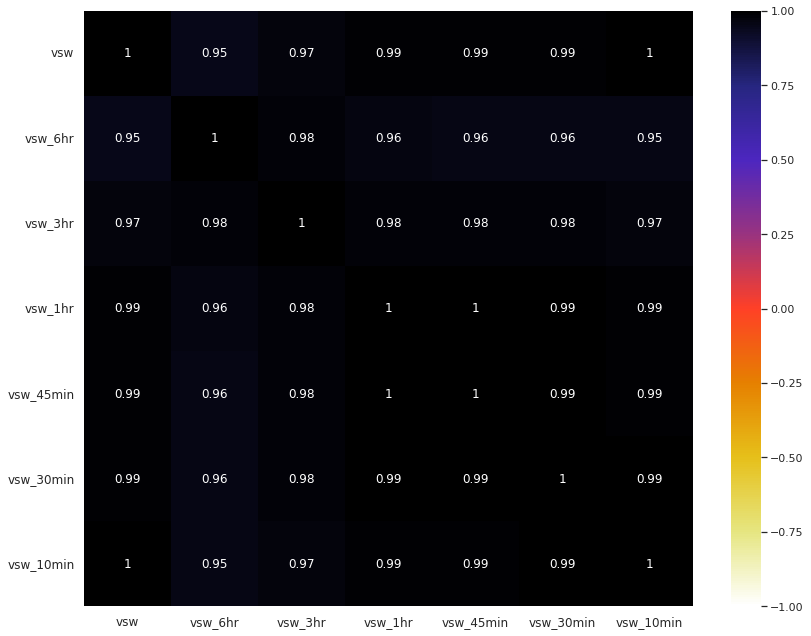

 
psw-group x psw-group correlation structure
 
Mean                  0.803410
Standard deviation    0.134867
 


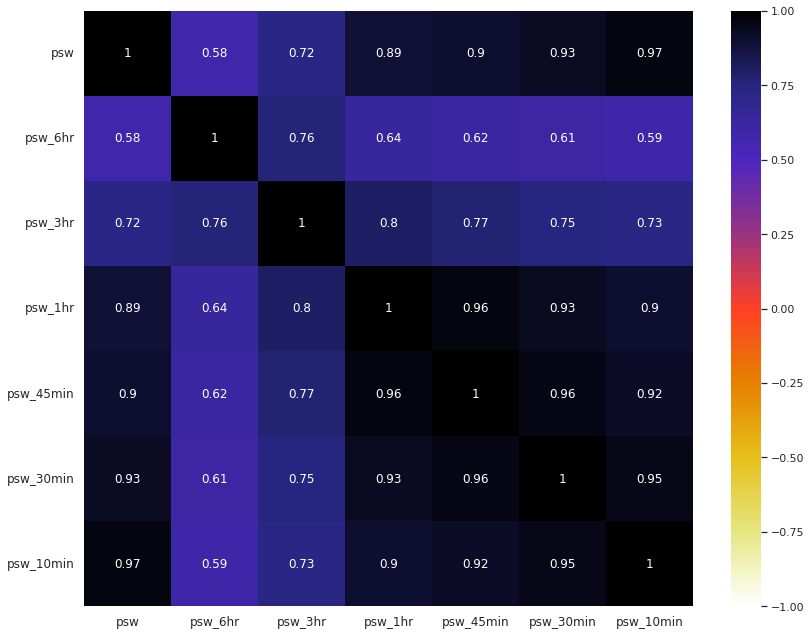

In [32]:
# Correlation structure within groups of features
for (i, j) in diag_list:
    corr_coeff_heatmap(i, j)
    print(" ")

## 3.4. Correlation structure between groups

AL-group x AU-group correlation structure
 
Mean                  -0.448839
Standard deviation     0.133491
 


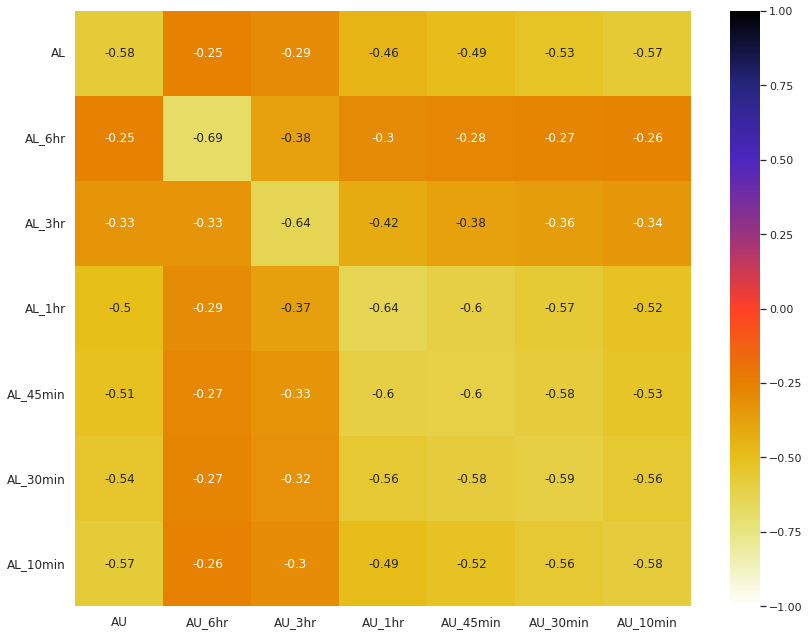

 
AL-group x SymH-group correlation structure
 
Mean                  0.303849
Standard deviation    0.058213
 


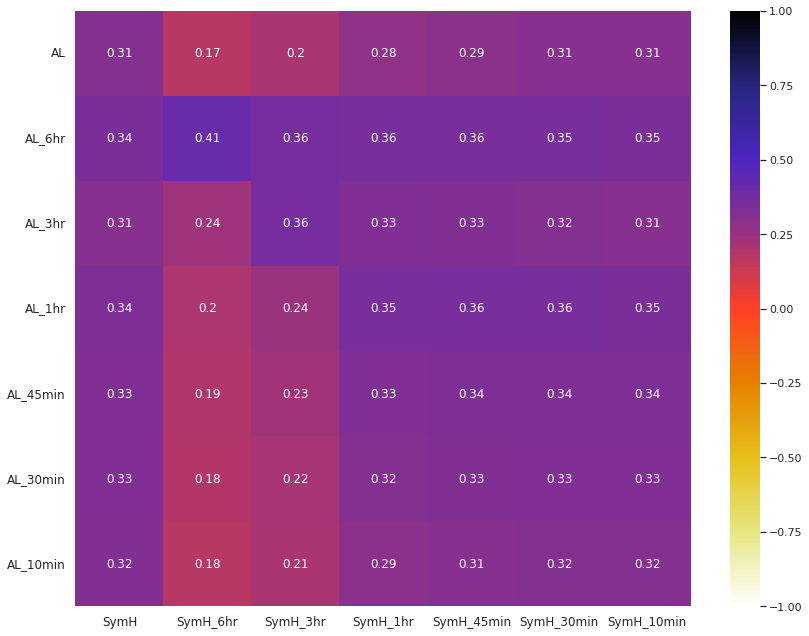

 
AL-group x PC-group correlation structure
 
Mean                  -0.366289
Standard deviation     0.175187
 


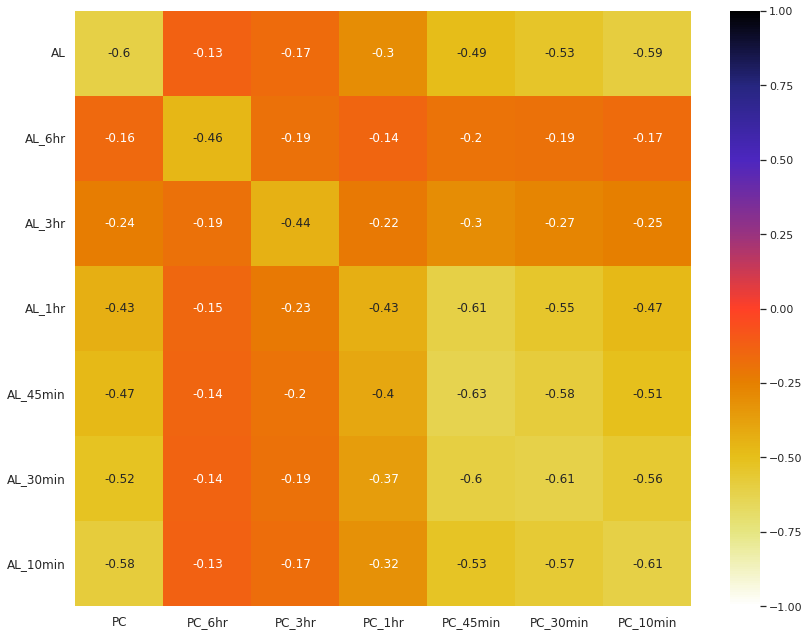

 
AU-group x PC-group correlation structure
 
Mean                  0.333277
Standard deviation    0.141469
 


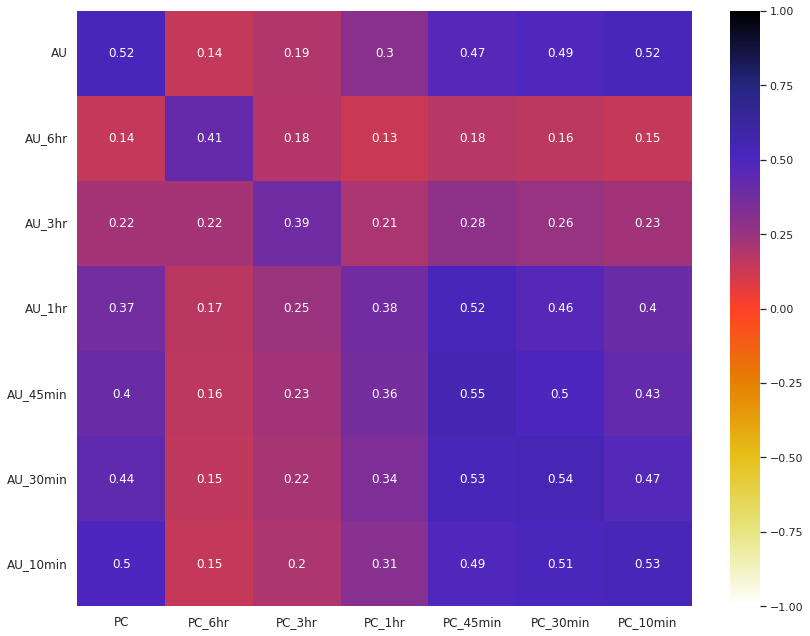

 
SymH-group x vsw-group correlation structure
 
Mean                  -0.342177
Standard deviation     0.013050
 


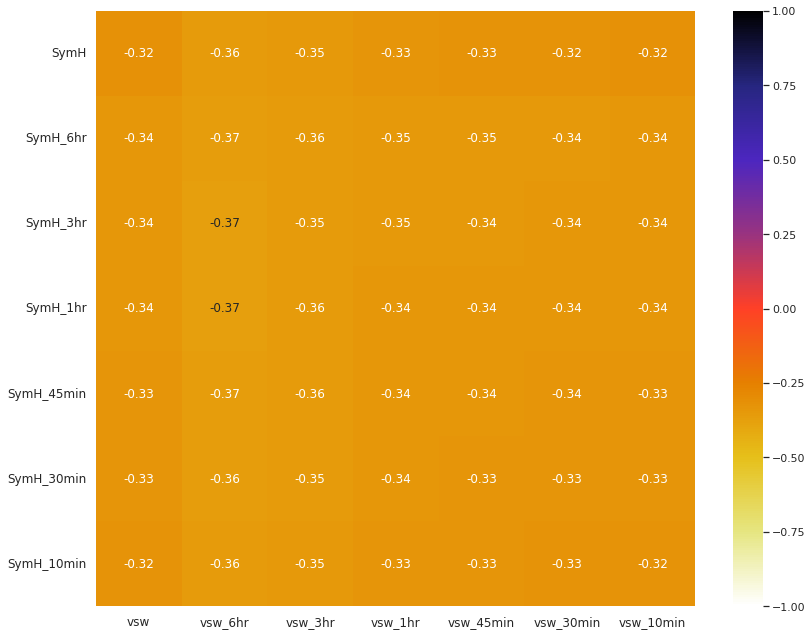

In [33]:
# Correlation structure between groups of features
for (i, j) in non_diag_list:
    corr_coeff_heatmap(i, j)
    print(" ")

# Acknowledgements

- [DMSP Particle Precipitation AI-ready Data](https://www.kaggle.com/datasets/saurabhshahane/dmsp-particle-precipitation-aiready-data)
- [Toward a Next Generation Particle Precipitation Model: Mesoscale Prediction Through Machine Learning (a Case Study and Framework for Progress)](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2020SW002684)

# References

- [Freedman-Diaconis rule](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule)

In [34]:
# Runtime and memory usage
stop = time.time()
print(pd.Series({"Process runtime": "{:.2f} seconds".format(float(stop - start)),
                 "Process memory usage": "{:.2f} MB".format(float(process.memory_info()[0]/(1024*1024)))}).to_string())

Process runtime         247.31 seconds
Process memory usage        2732.11 MB
